In [3]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('default')
%matplotlib inline

In [4]:
vasco = pd.read_csv('clean_vasco.csv')
ponda = pd.read_csv('clean_ponda.csv')
mapusa = pd.read_csv('clean_mapusa.csv')
margao = pd.read_csv('clean_margao.csv')
panaji = pd.read_csv('clean_panaji.csv')
df_total = pd.read_csv('clean_data.csv')

<span style='font-size:x-large'>Date wise data for all cities combined for various pollutant levels</span>


In [5]:
pollutants = ['PM2.5 µg/m3', 'PM10 µg/m3', 'NO2 µg/m3', 'SO2 µg/m3']

temp=df_total.groupby('SAMPLING DATE')[['PM2.5 µg/m3', 'PM10 µg/m3', 'NO2 µg/m3', 'SO2 µg/m3']].sum().reset_index()
temp=temp.melt(id_vars="SAMPLING DATE",value_vars=pollutants,var_name='Pollutants',value_name='Count')
temp.head()

import plotly.express as px
fig=px.area(temp,x='SAMPLING DATE',y='Count',color='Pollutants',height=600,title='Pollutants over time',color_discrete_sequence=['#393e46', '#ff2e63', '#456fe3','#78ffee'])
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

<span style='font-size:x-large'>AQI and PM10 µg/m3 are strongly related </span>


Text(0.5, 1.0, 'Correlation between attributes')

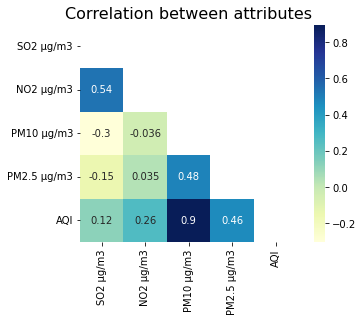

In [6]:
import seaborn as sns
import numpy as np
corr = df_total.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, cmap="YlGnBu", annot=True, mask=mask, square=True)
plt.title('Correlation between attributes', fontsize=16)

In [7]:
def histPlotter(cityname):
    plt.title(' Histogram for AQI data for '+cityname+' (2017 - 2021)', fontsize=16)
    plt.xlabel('AQI Bucket')
    plt.ylabel('Count')
    labels = ['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very poor', 'Severe','']
    bins = [0, 50, 100, 150, 200,  300,  400]
    plt.xticks(bins, labels, rotation = -45, horizontalalignment='left')
    plt.margins(y=0.1)

    data=''
    if cityname == 'panaji':
        data = panaji['AQI']
    elif cityname == 'margao':
        data = margao['AQI']
    elif cityname == 'vasco':
        data = vasco['AQI']
    elif cityname == 'ponda':
        data = ponda['AQI']
    elif cityname == 'mapusa':
        data = mapusa['AQI']
        

    counts, edges, bars = plt.hist(data, bins=bins, edgecolor="white")

    plt.bar_label(bars)
    plt.show()

<span style='font-size:x-large'>Distribution of AQI Levels for different cities</span>



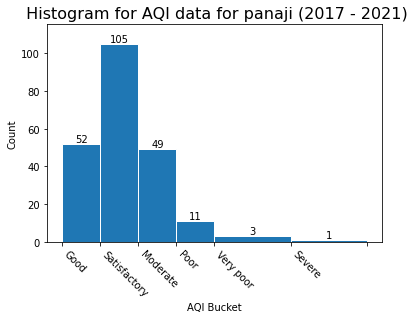

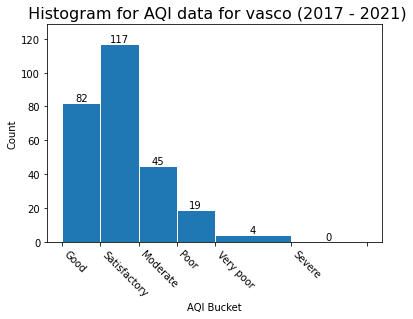

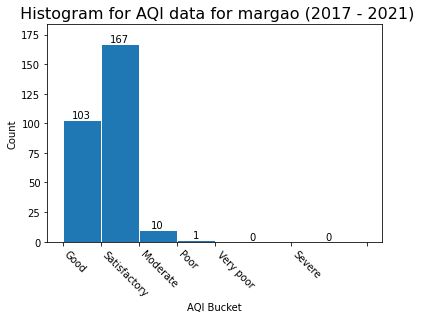

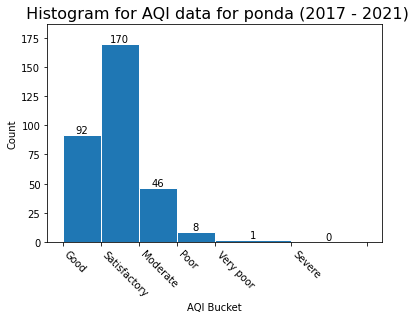

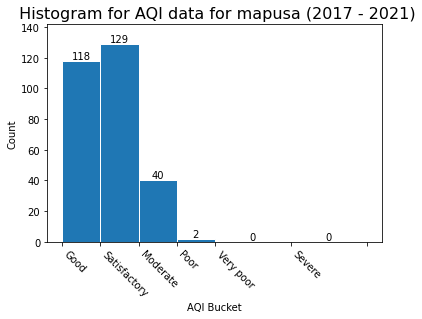

In [8]:

histPlotter('panaji')
histPlotter('vasco')
histPlotter('margao')
histPlotter('ponda')
histPlotter('mapusa')

In [9]:
ponda['SAMPLING DATE']=pd.to_datetime(ponda['SAMPLING DATE'])
vasco['SAMPLING DATE']=pd.to_datetime(vasco['SAMPLING DATE'])
mapusa['SAMPLING DATE']=pd.to_datetime(mapusa['SAMPLING DATE'])
margao['SAMPLING DATE']=pd.to_datetime(margao['SAMPLING DATE'])
panaji['SAMPLING DATE']=pd.to_datetime(ponda['SAMPLING DATE'])
# ponda.dropna(inplace=True)
vasco.dropna(inplace=True)
# margao.dropna(inplace=True)
# panaji.dropna(inplace=True)
mapusa.dropna(inplace=True)



In [10]:
def trend_plot(dataframe,location):
    df['month'] = [d.strftime('%m') for d in df['SAMPLING DATE']]
    df.sort_values(by=['month'], inplace=True)
    df.replace({'month':{'01':'Jan',  '02':'Feb', '03':'Mar',  '04':'Apr', '05':'May',  '06':'Jun', '07':'Jul',  '08':'Aug', '09':'Sep', '10':'Oct', '11':'Nov', '12':'Dec'}}, inplace=True)

    # Draw Plot
    fig, axes = plt.subplots(figsize=(18,6))

    a=sns.pointplot(x='month', y='SO2 µg/m3', data=df, color = 'blue')
    b=sns.pointplot(x='month', y='NO2 µg/m3', data=df, color = 'gray')
    c=sns.pointplot(x='month', y='PM10 µg/m3', data=df, color = 'purple')
    d=sns.pointplot(x='month', y='PM2.5 µg/m3', data=df, color = 'red')
    
    axes.set_title('Month-wise Pollutant data for '+location, fontsize=16)
    axes.set(xlabel='Month', ylabel="Pollutant in µg/m3")

    plt.legend(labels=['SO2 µg/m3', 'NO2 µg/m3','PM10 µg/m3','PM2.5 µg/m3'], labelcolor=['blue', 'gray', 'purple', 'red'])
    
    plt.show()

<span style='font-size:x-large'>Month\-wise trend for pollutant levels for each city</span>



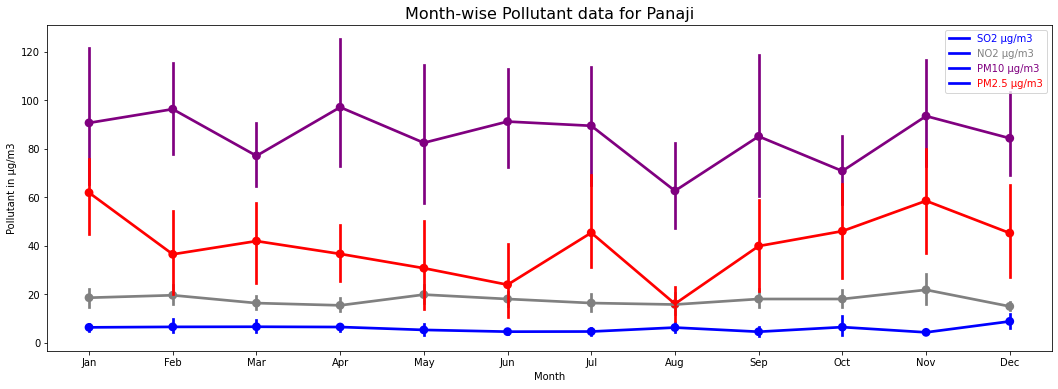

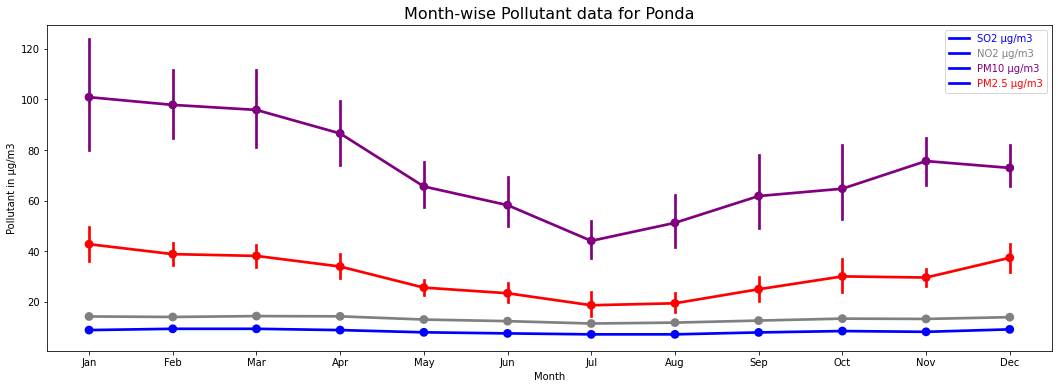

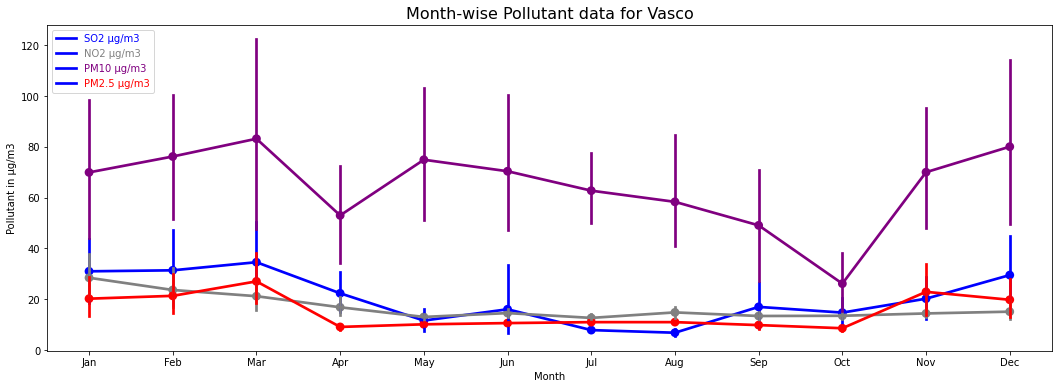

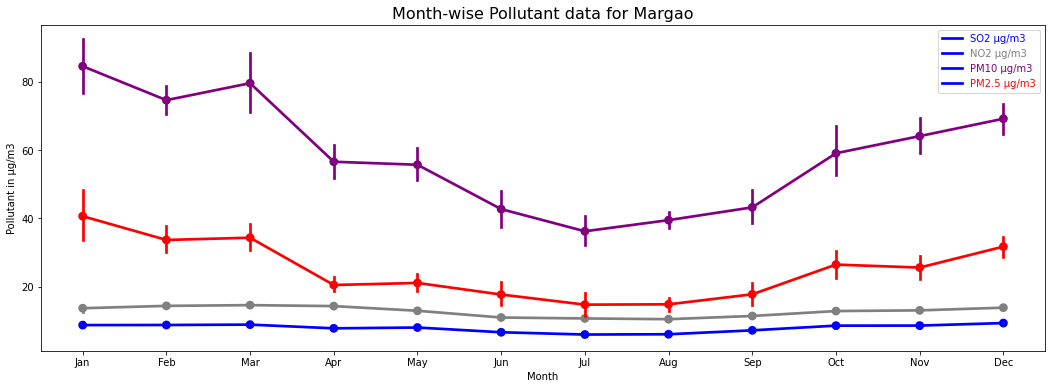

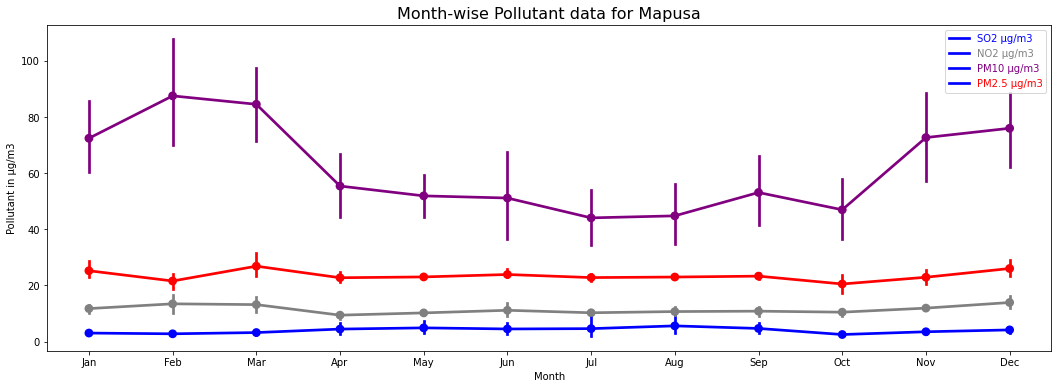

In [11]:
df = panaji.copy()
trend_plot(df,'Panaji')
df = ponda.copy()
trend_plot(df,'Ponda')
df = vasco.copy()
trend_plot(df,'Vasco')
df = margao.copy()
trend_plot(df,'Margao')
df = mapusa.copy()
trend_plot(df,'Mapusa')

In [12]:
def trend_plot_year(dataframe,location):
    df['year'] = [d.strftime('%Y') for d in df['SAMPLING DATE']]
    df.sort_values(by=['year'], inplace=True)
    

    # Draw Plot
    fig, axes = plt.subplots(figsize=(18,6))

    a=sns.pointplot(x='year', y='SO2 µg/m3', data=df, color = 'blue')
    b=sns.pointplot(x='year', y='NO2 µg/m3', data=df, color = 'gray')
    c=sns.pointplot(x='year', y='PM10 µg/m3', data=df, color = 'purple')
    d=sns.pointplot(x='year', y='PM2.5 µg/m3', data=df, color = 'red')
    
    axes.set_title('Year-wise Pollutant data for '+location, fontsize=16)
    axes.set(xlabel='Year', ylabel="Pollutant in µg/m3")

    plt.legend(labels=['SO2 µg/m3', 'NO2 µg/m3','PM10 µg/m3','PM2.5 µg/m3'], labelcolor=['blue', 'gray', 'purple', 'red'])
    
    plt.show()

<span style='font-size:x-large'>Year\-wise trend for pollutant level for each city</span>


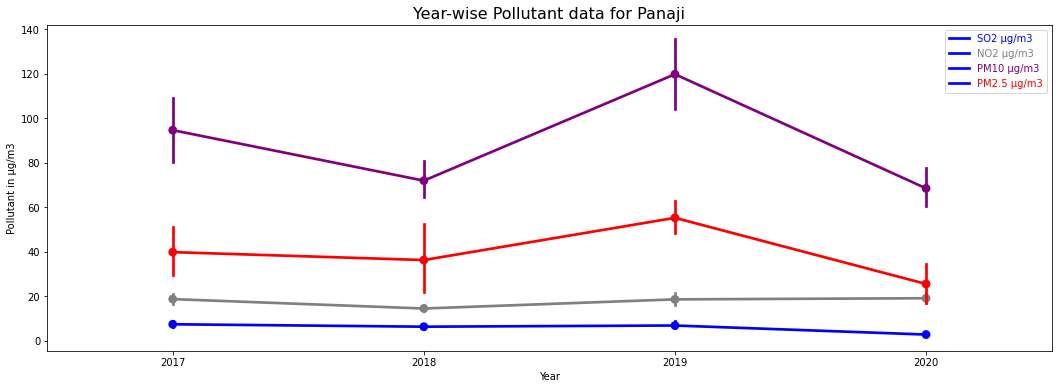

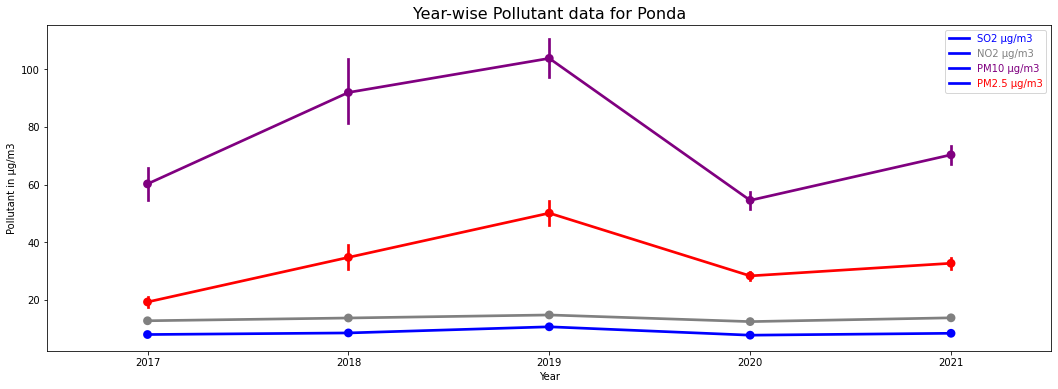

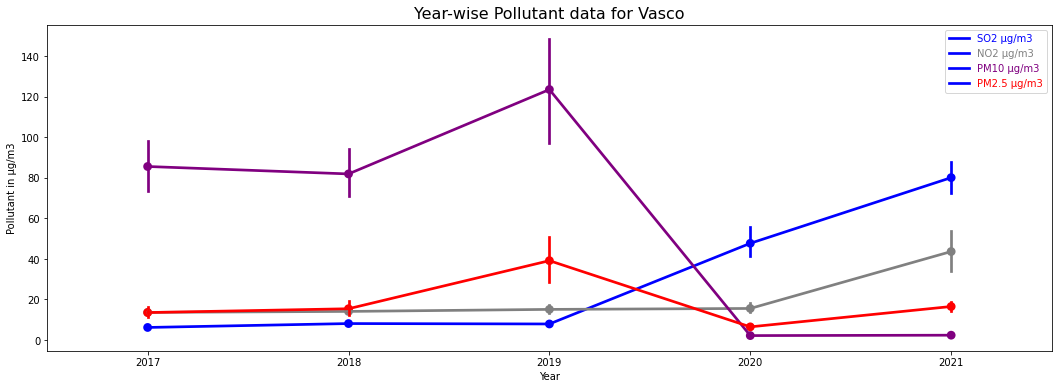

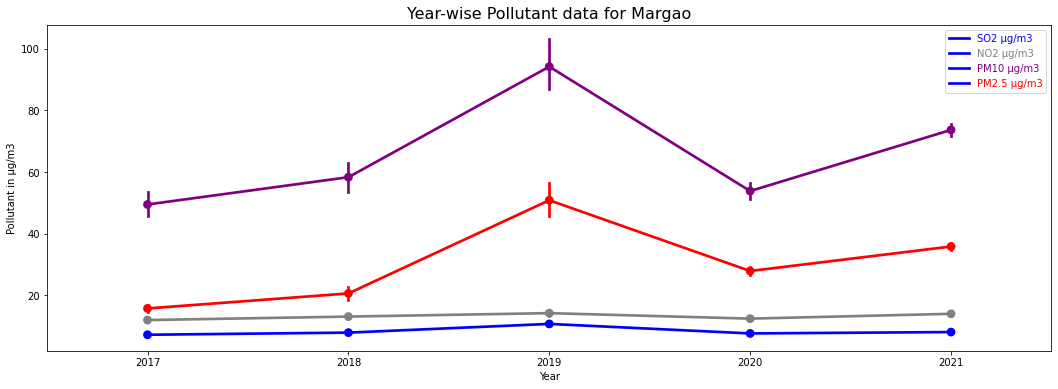

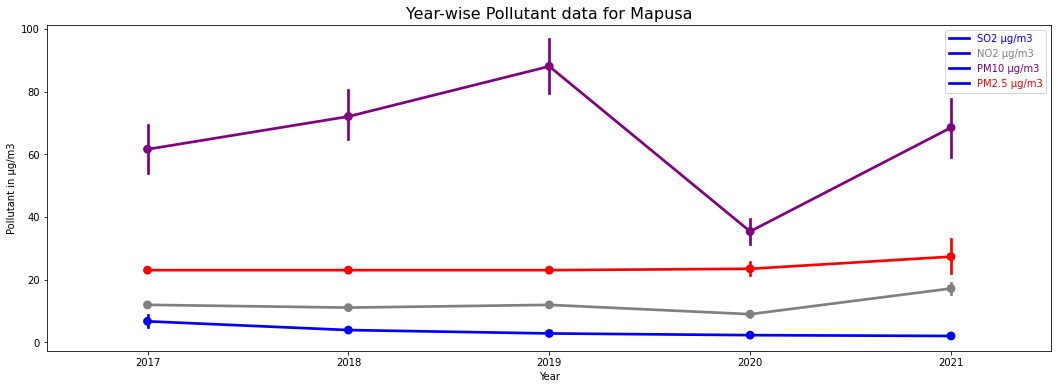

In [13]:
df = panaji.copy()
trend_plot_year(df,'Panaji')
df = ponda.copy()
trend_plot_year(df,'Ponda')
df = vasco.copy()
trend_plot_year(df,'Vasco')
df = margao.copy()
trend_plot_year(df,'Margao')
df = mapusa.copy()
trend_plot_year(df,'Mapusa')

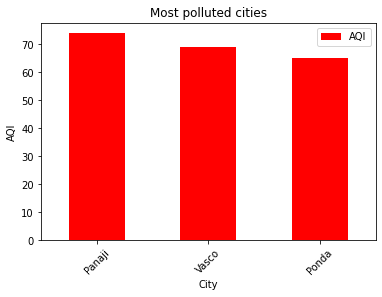

In [14]:
df_total[['AQI','City']].groupby(["City"]).median().sort_values(by='AQI',ascending=False).head(3).plot.bar(color='r', ylabel="AQI",rot=45,title="Most polluted cities")
plt.show()

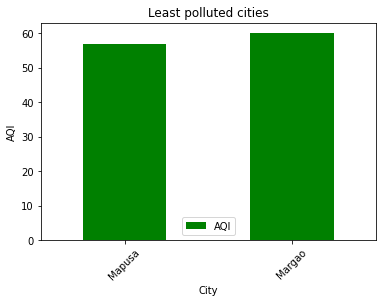

In [15]:
df_total[['AQI','City']].groupby(["City"]).median().sort_values(by='AQI',ascending=True).head(2).plot.bar(color='g', ylabel="AQI",rot=45, title="Least polluted cities")
plt.show()